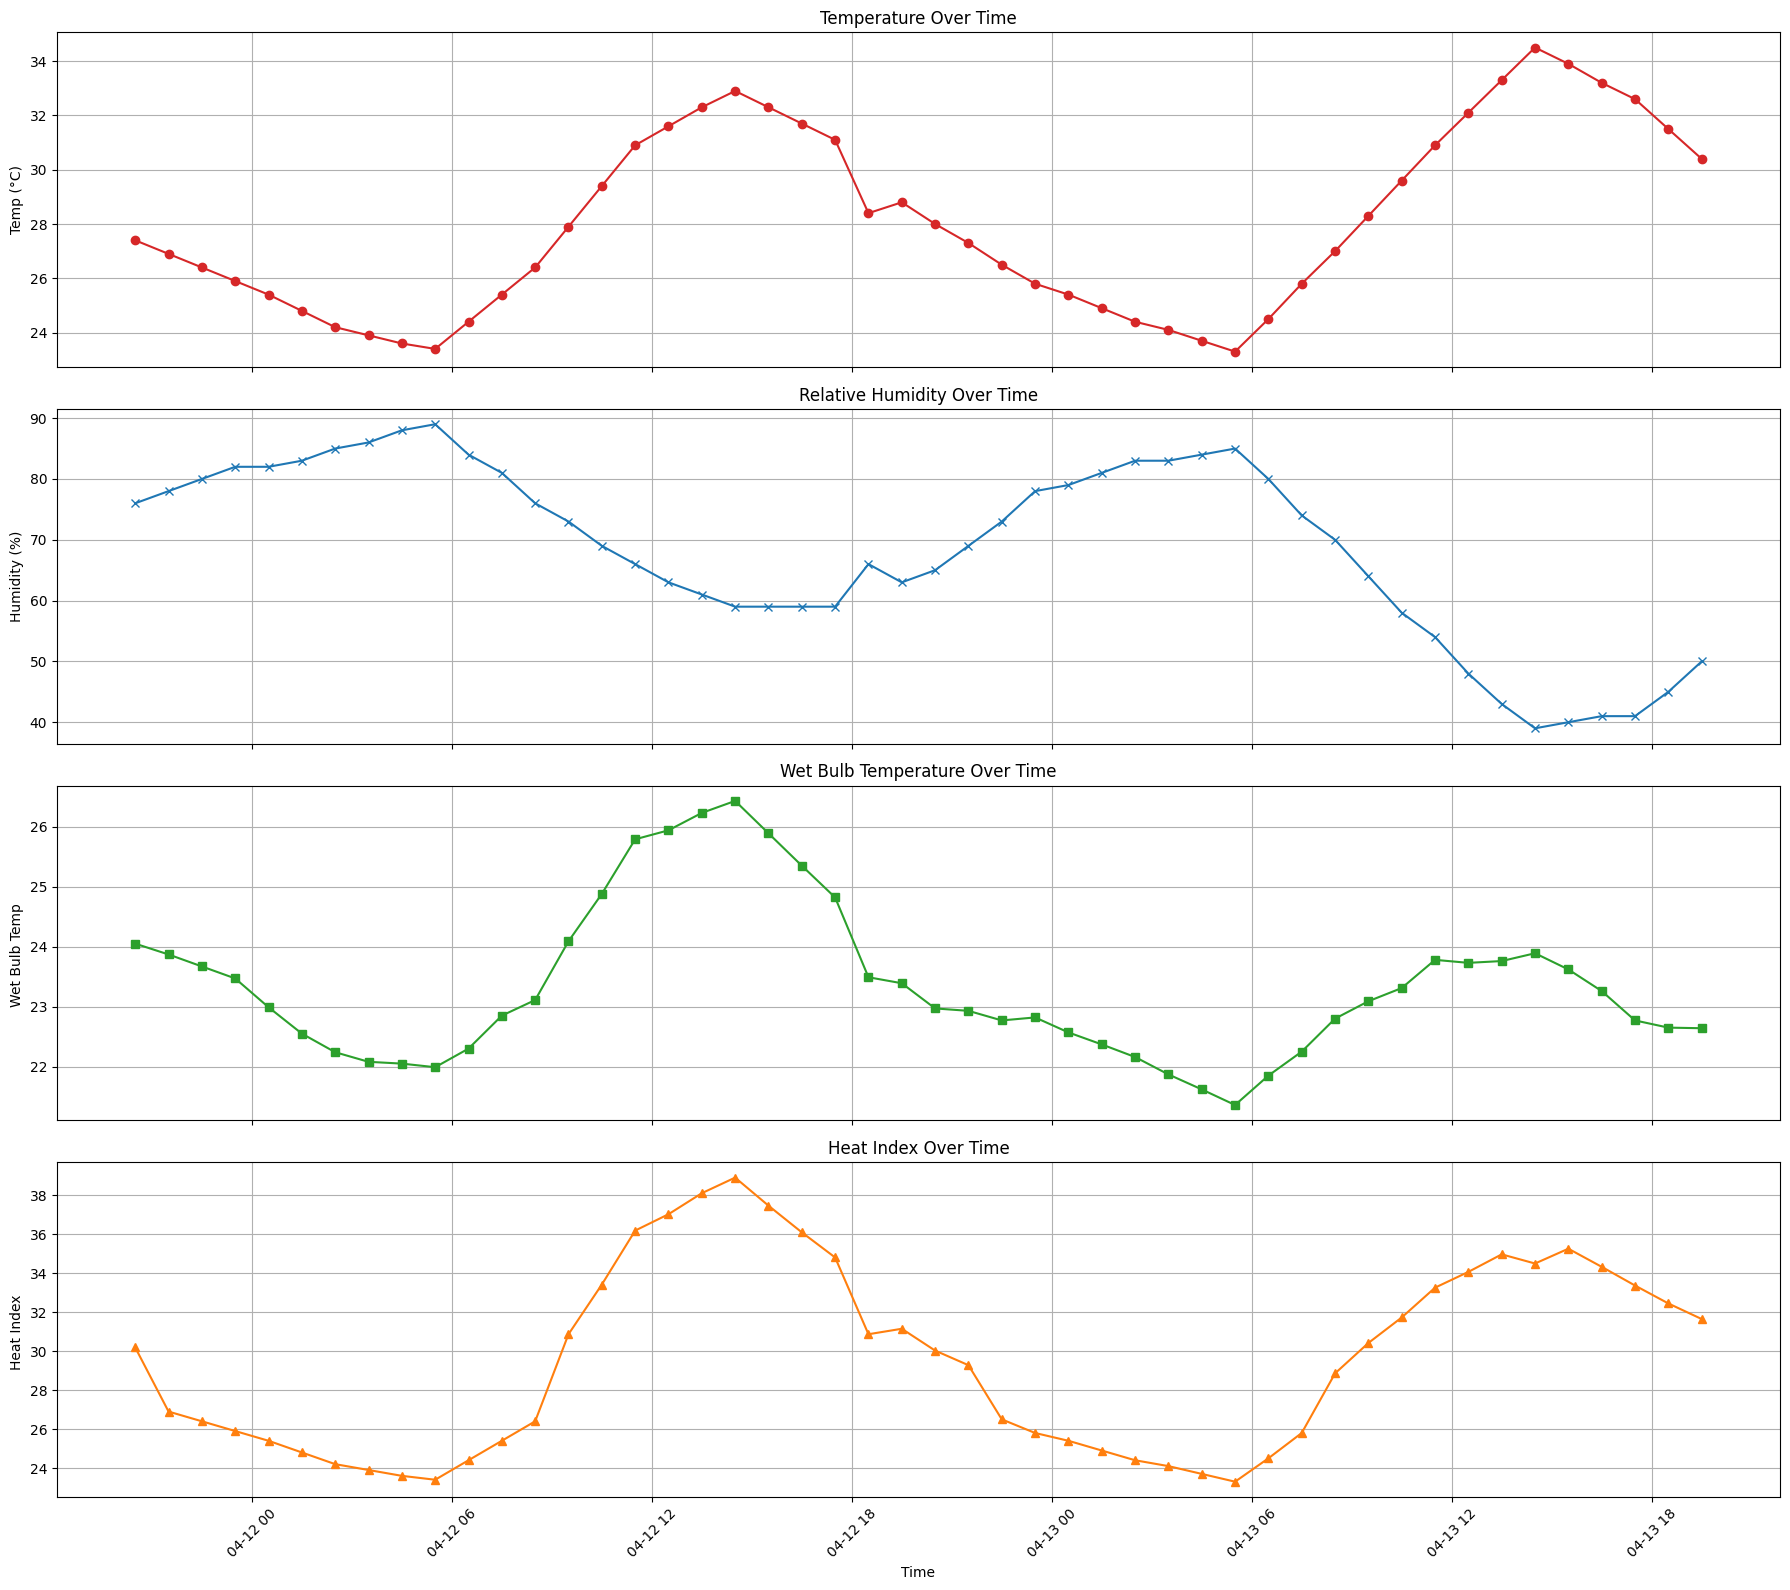

In [1]:

import requests
import math
import matplotlib.pyplot as plt
from datetime import datetime

# Location & API
lat = 28.7041
lon = 77.1025
api_key = "0e295f6835be4ff8a4331ce0bb858583"
url = f"https://api.weatherbit.io/v2.0/forecast/hourly?lat={lat}&lon={lon}&key={api_key}&hours=48"

response = requests.get(url)

# --- Function to calculate Wet Bulb Temp using Stull's formula ---
def wet_bulb_temp(T, RH):
    return T * math.atan(0.151977 * (RH + 8.313659) ** 0.5) + \
           math.atan(T + RH) - math.atan(RH - 1.676331) + \
           0.00391838 * RH ** 1.5 * math.atan(0.023101 * RH) - 4.686035

# --- Function to calculate Heat Index using simplified Rothfusz regression ---
def heat_index(T, RH):
    # Applies only if T >= 27°C and RH >= 40%
    if T < 27 or RH < 40:
        return T
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582
    return c1 + c2 * T + c3 * RH + c4 * T * RH + c5 * T ** 2 + c6 * RH ** 2 + c7 * T ** 2 * RH + c8 * T * RH ** 2 + c9 * T ** 2 * RH ** 2


if response.status_code == 200:
    data = response.json().get('data', [])
    if data:
        timestamps, temps, hums, wbt_list, hi_list = [], [], [], [], []

        for entry in data:
            ts = datetime.strptime(entry['timestamp_local'], "%Y-%m-%dT%H:%M:%S")
            temp = entry['temp']
            hum = entry['rh']

            wbt = wet_bulb_temp(temp, hum)
            hi = heat_index(temp, hum)

            timestamps.append(ts)
            temps.append(temp)
            hums.append(hum)
            wbt_list.append(round(wbt, 2))
            hi_list.append(round(hi, 2))


        fig, axs = plt.subplots(4, 1, figsize=(18, 16), sharex=True)

        axs[0].plot(timestamps, temps, color='tab:red', marker='o')
        axs[0].set_ylabel("Temp (°C)")
        axs[0].set_title("Temperature Over Time")
        axs[0].grid(True)

        axs[1].plot(timestamps, hums, color='tab:blue', marker='x')
        axs[1].set_ylabel("Humidity (%)")
        axs[1].set_title("Relative Humidity Over Time")
        axs[1].grid(True)

        axs[2].plot(timestamps, wbt_list, color='tab:green', marker='s')
        axs[2].set_ylabel("Wet Bulb Temp ")
        axs[2].set_title("Wet Bulb Temperature Over Time")
        axs[2].grid(True)

        axs[3].plot(timestamps, hi_list, color='tab:orange', marker='^')
        axs[3].set_ylabel("Heat Index ")
        axs[3].set_title("Heat Index Over Time")
        axs[3].set_xlabel("Time")
        axs[3].grid(True)

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data found in the response.")
else:
    print(f"Error fetching data. Status code: {response.status_code}")


In [2]:
data

[{'app_temp': 30.2,
  'clouds': 75,
  'clouds_hi': 100,
  'clouds_low': 0,
  'clouds_mid': 80,
  'datetime': '2025-04-11:15',
  'dewpt': 22.8,
  'dhi': 0,
  'dni': 0,
  'ghi': 0,
  'ozone': 303,
  'pod': 'n',
  'pop': 0,
  'precip': 0,
  'pres': 978,
  'rh': 76,
  'slp': 1004,
  'snow': 0,
  'snow_depth': 0,
  'solar_rad': 0,
  'temp': 27.4,
  'timestamp_local': '2025-04-11T20:30:00',
  'timestamp_utc': '2025-04-11T15:00:00',
  'ts': 1744383600,
  'uv': 0,
  'vis': 24,
  'weather': {'code': 802, 'icon': 'c02n', 'description': 'Scattered clouds'},
  'wind_cdir': 'E',
  'wind_cdir_full': 'east',
  'wind_dir': 90,
  'wind_gust_spd': 7.63,
  'wind_spd': 4.12},
 {'app_temp': 29.3,
  'clouds': 73,
  'clouds_hi': 10,
  'clouds_low': 0,
  'clouds_mid': 81,
  'datetime': '2025-04-11:16',
  'dewpt': 22.7,
  'dhi': 0,
  'dni': 0,
  'ghi': 0,
  'ozone': 300,
  'pod': 'n',
  'pop': 0,
  'precip': 0,
  'pres': 979,
  'rh': 78,
  'slp': 1005,
  'snow': 0,
  'snow_depth': 0,
  'solar_rad': 0,
  'temp'